## Exploratory Data Analysis
### Topic: Predicting urinary tract infections in the emergency department with machine learning
1. **Data Source**: Taylor, R. Andrew; Moore, Christopher L.; Cheung, Kei-Hoi; Brandt, Cynthia (2018). Predicting urinary tract infections in the emergency department with machine learning. PLOS ONE. Dataset. https://doi.org/10.1371/journal.pone.0194085
   https://doi.org/10.1371/journal.pone.0194085
2. **Data Description**: Using the final cohort (excluding patients without urine culture; without UTI sympton; age <18)
   
   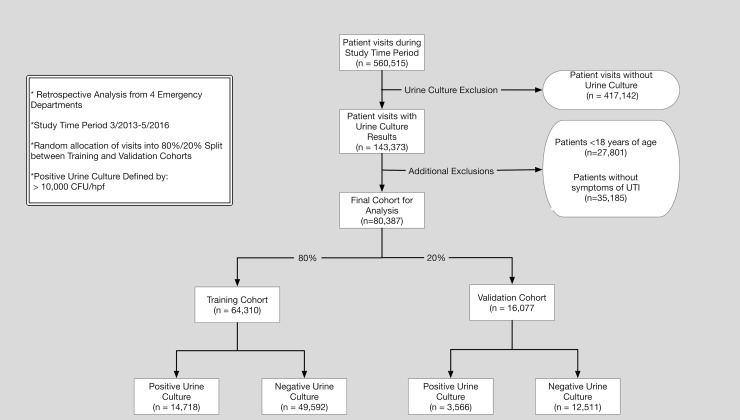
4. **Encoding Categorical Data**: ua_bateria, ua_bili, ua_blood, ua_clarity, ua_color, ua_epi, ua_glucose, ua_ketones, ua_leuk, ua_nitrite, ua_protein, ua_rbc, ua_spec_grav, ua_urobili, ua_wbc

Takeaways:
1. 

In [2]:
import pandas as pd
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_bar,geom_boxplot

In [4]:
df = pd.read_csv('S1File.csv')
df.head()

,ID,PATID,UCX_abnormal,ua_bacteria,ua_bili,ua_blood,ua_clarity,ua_color,ua_epi,ua_glucose,...,SKIN_PREPS,SMOKING_DETERRENTS,THYROID_PREPS,UNCLASSIFIED_DRUG_PRODUCTS,VITAMINS,dispo,UTI_diag,split,abxUTI,alt_diag
0,1,1,yes,few,negative,negative,clear,yellow,small,negative,...,No,No,No,No,No,Admit,Yes,training,yes,0
1,2,1,no,many,negative,small,clear,yellow,not_reported,negative,...,No,No,No,No,Yes,Admit,Yes,training,yes,0
2,3,2,yes,few,negative,negative,clear,yellow,small,negative,...,No,No,Yes,Yes,No,Discharge,No,training,no,0
3,4,3,yes,many,negative,negative,not_clear,yellow,not_reported,negative,...,No,No,No,No,Yes,Admit,Yes,training,yes,0
4,5,4,no,moderate,small,negative,clear,orange,not_reported,negative,...,No,No,No,No,No,AMA,No,training,no,0


In [5]:
df.loc[:,'Abdominal_hernia':'Urinary_tract_infections'].columns

Index(['Abdominal_hernia', 'Abdominal_pain',
       'Acute_and_unspecified_renal_failure', 'Anal_and_rectal_conditions',
       'Calculus_of_urinary_tract', 'Cancer', 'Chronic_renal_failure',
       'Congestive_heart_failure__nonhypertensive',
       'Coronary_atherosclerosis_and_other_heart_disease',
       'Delirium__dementia__and_amnestic_and_other_cognitive_disorders',
       'Diabetes_mellitus_with_complications',
       'Diabetes_mellitus_without_complication',
       'Diabetes_or_abnormal_glucose_tolerance_complicating_pregnancy__childbirth__or_the_puerperium',
       'Genitourinary_congenital_anomalies',
       'Genitourinary_symptoms_and_ill_defined_conditions',
       'Heart_valve_disorders', 'HIV_infection', 'Hodgkins_disease',
       'Hyperplasia_of_prostate',
       'Inflammatory_conditions_of_male_genital_organs', 'Leukemias',
       'Maintenance_chemotherapy__radiotherapy', 'Menstrual_disorders',
       'Nephritis__nephrosis__renal_sclerosis', 'Non_Hodgkins_lymphoma',
  

In [8]:
df['UCX_abnormal'] =  df['UCX_abnormal'].apply(lambda x: x.replace('yes','Yes').replace('no','No'))

In [10]:
df['Diff'] = df['UCX_abnormal'] == df['UTI_diag']

NameError: name 'df_corr' is not defined

### 0. Correlation


In [16]:
from sklearn.preprocessing import LabelEncoder
cat_attr = ['UCX_abnormal','gender','race', 'ethnicity', 'lang', 'employStatus', 'maritalStatus','chief_complaint','ua_bacteria', 'ua_bili', 'ua_blood',
       'ua_clarity', 'ua_color', 'ua_epi', 'ua_glucose', 'ua_ketones',
       'ua_leuk', 'ua_nitrite','ua_protein', 'ua_rbc',
       'ua_spec_grav', 'ua_urobili', 'ua_wbc','CVA_tenderness', 'abd_tenderness', 'abd_soft', 'abd_distended',
       'abd_gaurding', 'abd_mass', 'abd_rebound', 'abd_rigidity', 'back_pain',
       'fatigue', 'fever', 'vag_bleeding', 'vag_discharge', 'abd_distended2',
       'abd_pain', 'gen_neg', 'pelvic_pain', 'alert', 'ams', 'weakness',
       'oriented', 'psychiatric_confusion', 'flank_pain', 'dec_urine_vol',
       'diff_urinating', 'dysuria', 'hematuria', 'polyuria','Abdominal_hernia', 'Abdominal_pain',
       'Acute_and_unspecified_renal_failure', 'Anal_and_rectal_conditions',
       'Calculus_of_urinary_tract', 'Cancer', 'Chronic_renal_failure',
       'Congestive_heart_failure__nonhypertensive',
       'Coronary_atherosclerosis_and_other_heart_disease',
       'Delirium__dementia__and_amnestic_and_other_cognitive_disorders',
       'Diabetes_mellitus_with_complications',
       'Diabetes_mellitus_without_complication',
       'Diabetes_or_abnormal_glucose_tolerance_complicating_pregnancy__childbirth__or_the_puerperium',
       'Genitourinary_congenital_anomalies',
       'Genitourinary_symptoms_and_ill_defined_conditions',
       'Heart_valve_disorders', 'HIV_infection', 'Hodgkins_disease',
       'Hyperplasia_of_prostate',
       'Inflammatory_conditions_of_male_genital_organs', 'Leukemias',
       'Maintenance_chemotherapy__radiotherapy', 'Menstrual_disorders',
       'Nephritis__nephrosis__renal_sclerosis', 'Non_Hodgkins_lymphoma',
       'Other_and_ill_defined_heart_disease', 'Other_female_genital_disorders',
       'Other_male_genital_disorders', 'Other_non_epithelial_cancer_of_skin',
       'Pancreatic_disorders__not_diabetes_', 'Paralysis',
       'Parkinsons_disease', 'Poisoning_by_nonmedicinal_substances',
       'Prolapse_of_female_genital_organs', 'Pulmonary_heart_disease',
       'Screening_and_history_of_mental_health_and_substance_abuse_codes',
       'Septicemia__except_in_labor_',
       'Sexually_transmitted_infections__not_HIV_or_hepatitis_',
       'Substance_related_disorders', 'Urinary_tract_infections']
df_corr = df[['UCX_abnormal','age','gender','race', 'ethnicity', 'lang', 'employStatus', 'maritalStatus','chief_complaint','ua_bacteria', 'ua_bili', 'ua_blood',
       'ua_clarity', 'ua_color', 'ua_epi', 'ua_glucose', 'ua_ketones','ua_ph',
       'ua_leuk', 'ua_nitrite','ua_protein', 'ua_rbc',
       'ua_spec_grav', 'ua_urobili', 'ua_wbc','CVA_tenderness', 'abd_tenderness', 'abd_soft', 'abd_distended',
       'abd_gaurding', 'abd_mass', 'abd_rebound', 'abd_rigidity', 'back_pain',
       'fatigue', 'fever', 'vag_bleeding', 'vag_discharge', 'abd_distended2',
       'abd_pain', 'gen_neg', 'pelvic_pain', 'alert', 'ams', 'weakness',
       'oriented', 'psychiatric_confusion', 'flank_pain', 'dec_urine_vol',
       'diff_urinating', 'dysuria', 'hematuria', 'polyuria','Abdominal_hernia', 'Abdominal_pain',
       'Acute_and_unspecified_renal_failure', 'Anal_and_rectal_conditions',
       'Calculus_of_urinary_tract', 'Cancer', 'Chronic_renal_failure',
       'Congestive_heart_failure__nonhypertensive',
       'Coronary_atherosclerosis_and_other_heart_disease',
       'Delirium__dementia__and_amnestic_and_other_cognitive_disorders',
       'Diabetes_mellitus_with_complications',
       'Diabetes_mellitus_without_complication',
       'Diabetes_or_abnormal_glucose_tolerance_complicating_pregnancy__childbirth__or_the_puerperium',
       'Genitourinary_congenital_anomalies',
       'Genitourinary_symptoms_and_ill_defined_conditions',
       'Heart_valve_disorders', 'HIV_infection', 'Hodgkins_disease',
       'Hyperplasia_of_prostate',
       'Inflammatory_conditions_of_male_genital_organs', 'Leukemias',
       'Maintenance_chemotherapy__radiotherapy', 'Menstrual_disorders',
       'Nephritis__nephrosis__renal_sclerosis', 'Non_Hodgkins_lymphoma',
       'Other_and_ill_defined_heart_disease', 'Other_female_genital_disorders',
       'Other_male_genital_disorders', 'Other_non_epithelial_cancer_of_skin',
       'Pancreatic_disorders__not_diabetes_', 'Paralysis',
       'Parkinsons_disease', 'Poisoning_by_nonmedicinal_substances',
       'Prolapse_of_female_genital_organs', 'Pulmonary_heart_disease',
       'Screening_and_history_of_mental_health_and_substance_abuse_codes',
       'Septicemia__except_in_labor_',
       'Sexually_transmitted_infections__not_HIV_or_hepatitis_',
       'Substance_related_disorders', 'Urinary_tract_infections']]


In [18]:
label_encoder = LabelEncoder()
ua_ph_mean = df_corr[df_corr.ua_ph != 'not_reported'][df_corr.ua_ph != 'other']['ua_ph'].astype('float').mean()
for attr in cat_attr:
    df_corr.loc[:,attr] = label_encoder.fit_transform(df_corr.loc[:,attr])
df_corr['age'] = df_corr['age'].replace('not reported', df_corr['age'].mean())
df_corr['ua_ph'] = df_corr['ua_ph'].replace('not_reported', ua_ph_mean).replace('other',ua_ph_mean).astype('float')

/var/folders/7k/xyz4vj2s7ys2w9r3j0jkhg0c0000gn/T/ipykernel_72861/3644864110.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/var/folders/7k/xyz4vj2s7ys2w9r3j0jkhg0c0000gn/T/ipykernel_72861/3644864110.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/7k/xyz4vj2s7ys2w9r3j0jkhg0c0000gn/T/ipykernel_72861/3644864110.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


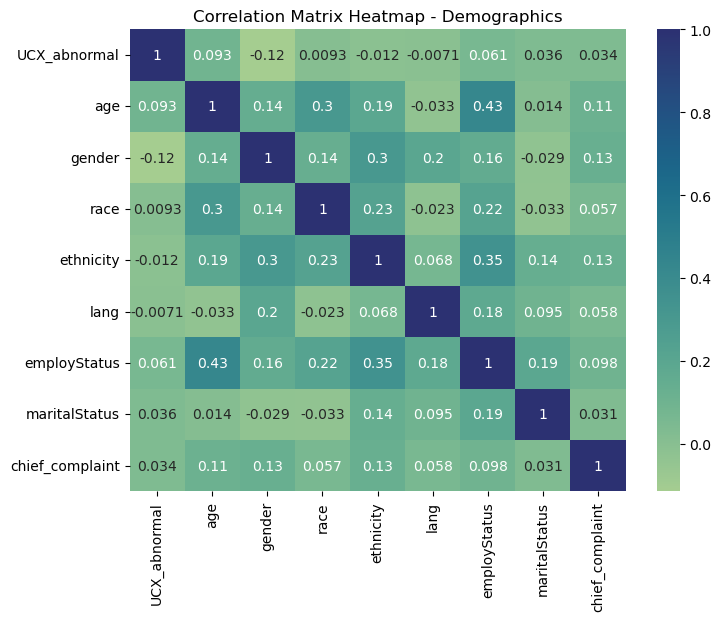

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix_demo = df_corr[['UCX_abnormal','age','gender','race', 'ethnicity', 'lang', 'employStatus', 'maritalStatus','chief_complaint']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_demo, annot=True,cmap="crest")

# Step 4: Display the heatmap
plt.title('Correlation Matrix Heatmap - Demographics')
plt.show()

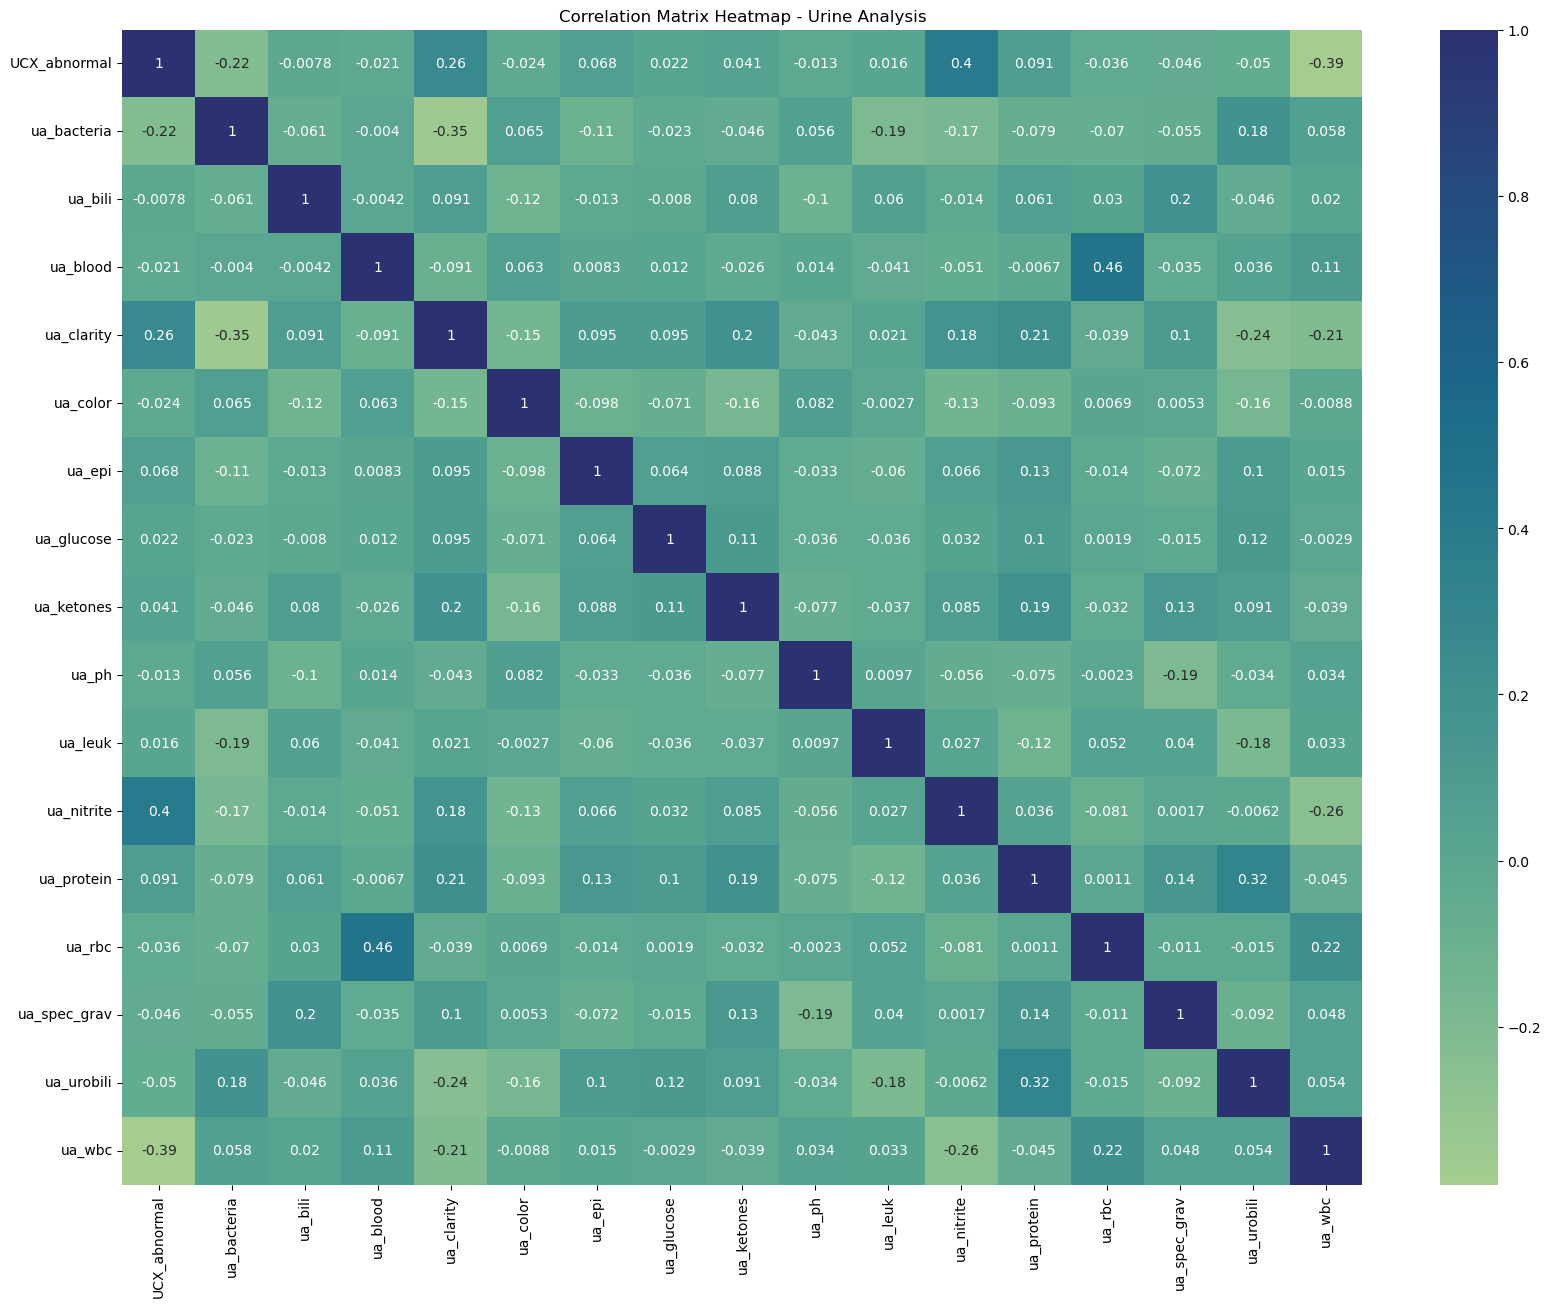

In [26]:
correlation_matrix_ua = df_corr[['UCX_abnormal','ua_bacteria', 'ua_bili', 'ua_blood',
       'ua_clarity', 'ua_color', 'ua_epi', 'ua_glucose', 'ua_ketones','ua_ph',
       'ua_leuk', 'ua_nitrite','ua_protein', 'ua_rbc',
       'ua_spec_grav', 'ua_urobili', 'ua_wbc']].corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix_ua, annot=True, cmap="crest")

# Step 4: Display the heatmap
plt.title('Correlation Matrix Heatmap - Urine Analysis')
plt.show()

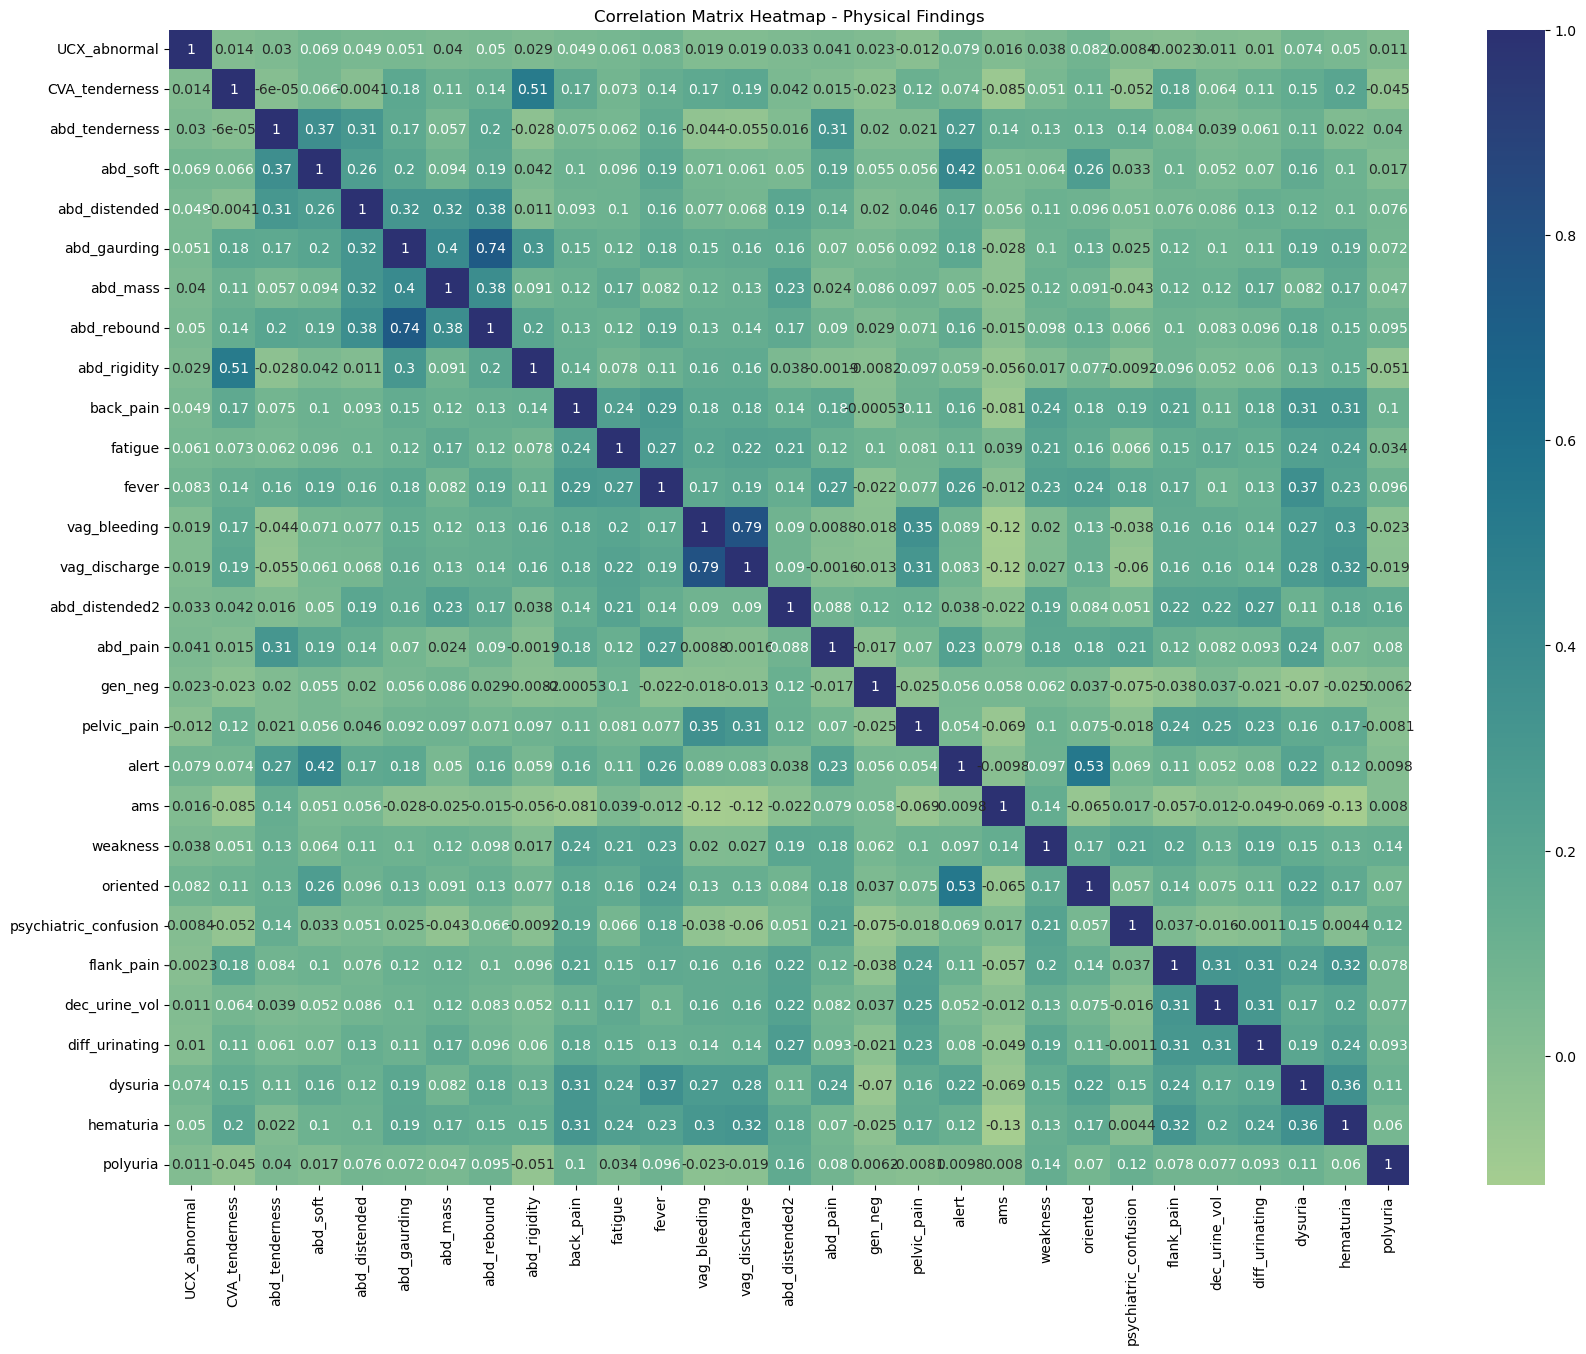

In [32]:
# physical findings
correlation_matrix_phy = df_corr[['UCX_abnormal','CVA_tenderness', 'abd_tenderness', 'abd_soft', 'abd_distended',
       'abd_gaurding', 'abd_mass', 'abd_rebound', 'abd_rigidity', 'back_pain',
       'fatigue', 'fever', 'vag_bleeding', 'vag_discharge', 'abd_distended2',
       'abd_pain', 'gen_neg', 'pelvic_pain', 'alert', 'ams', 'weakness',
       'oriented', 'psychiatric_confusion', 'flank_pain', 'dec_urine_vol',
       'diff_urinating', 'dysuria', 'hematuria', 'polyuria']].corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix_phy, annot=True, cmap="crest")

# Step 4: Display the heatmap
plt.title('Correlation Matrix Heatmap - Physical Findings')
plt.show()

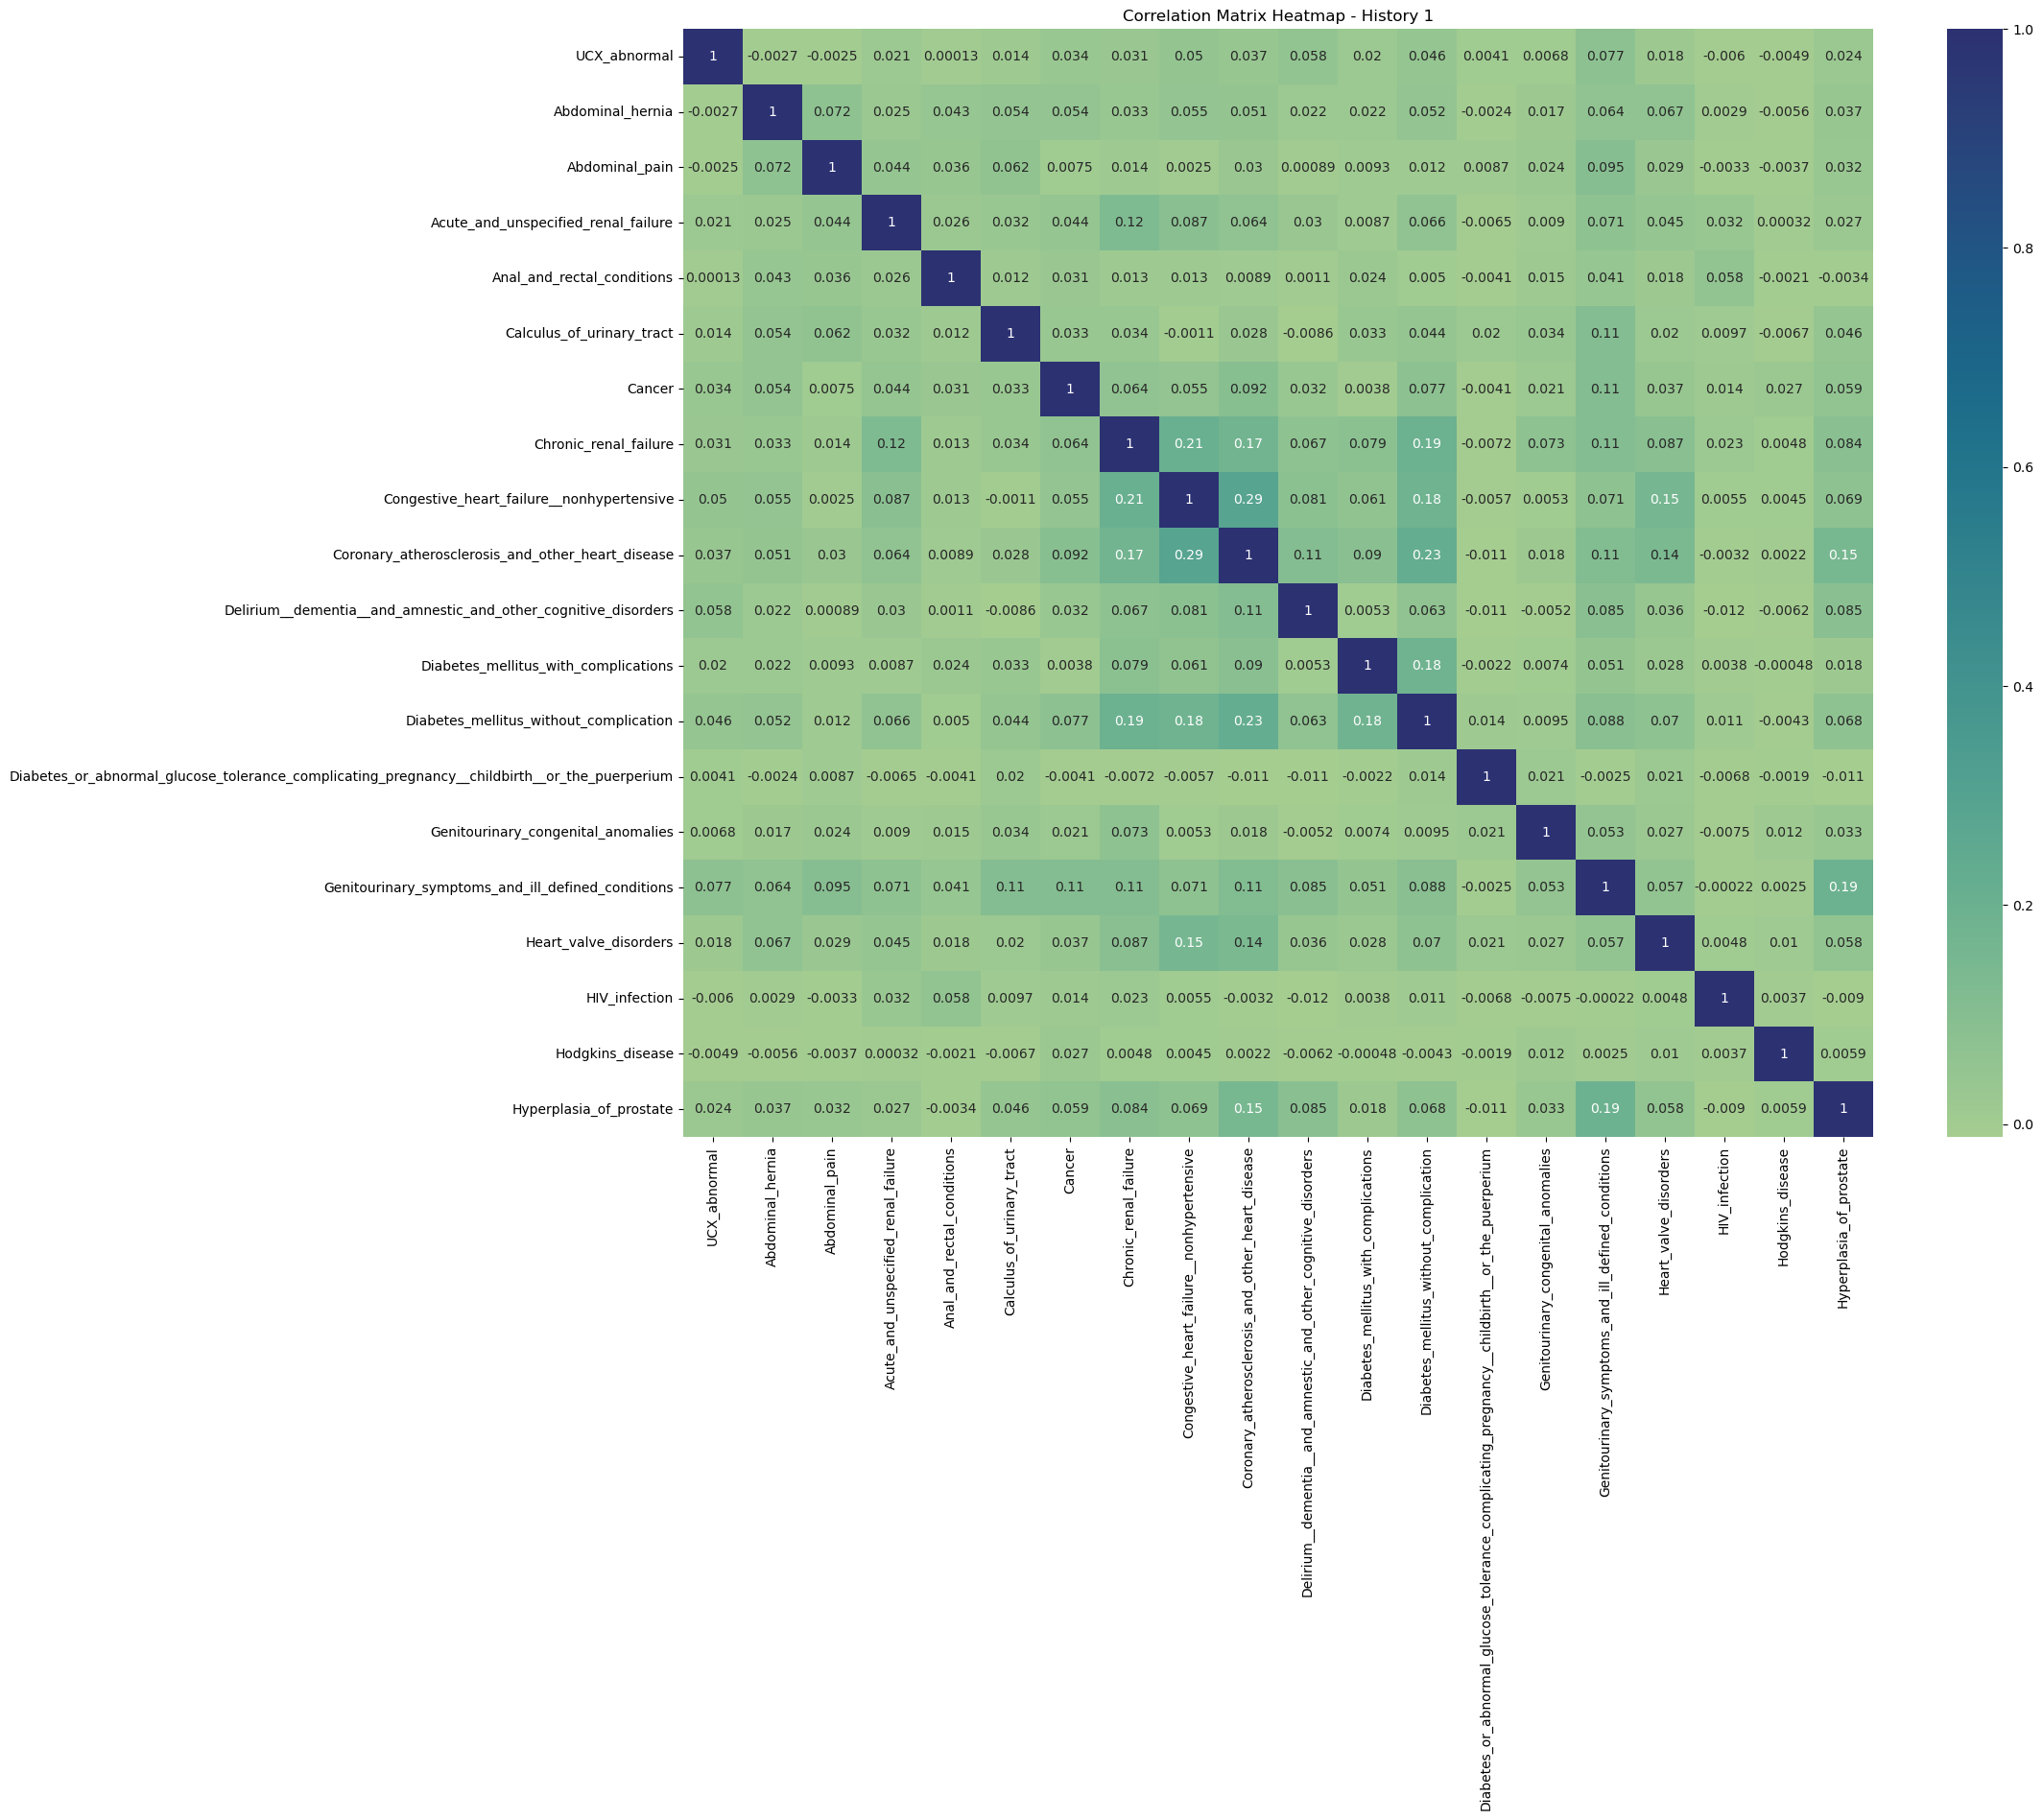

In [34]:
# physical findings
correlation_matrix_his_1 = df_corr[['UCX_abnormal','Abdominal_hernia', 'Abdominal_pain',
       'Acute_and_unspecified_renal_failure', 'Anal_and_rectal_conditions',
       'Calculus_of_urinary_tract', 'Cancer', 'Chronic_renal_failure',
       'Congestive_heart_failure__nonhypertensive',
       'Coronary_atherosclerosis_and_other_heart_disease',
       'Delirium__dementia__and_amnestic_and_other_cognitive_disorders',
       'Diabetes_mellitus_with_complications',
       'Diabetes_mellitus_without_complication',
       'Diabetes_or_abnormal_glucose_tolerance_complicating_pregnancy__childbirth__or_the_puerperium',
       'Genitourinary_congenital_anomalies',
       'Genitourinary_symptoms_and_ill_defined_conditions',
       'Heart_valve_disorders', 'HIV_infection', 'Hodgkins_disease',
       'Hyperplasia_of_prostate']].corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix_his_1, annot=True,cmap="crest" )

# Step 4: Display the heatmap
plt.title('Correlation Matrix Heatmap - History 1')
plt.show()

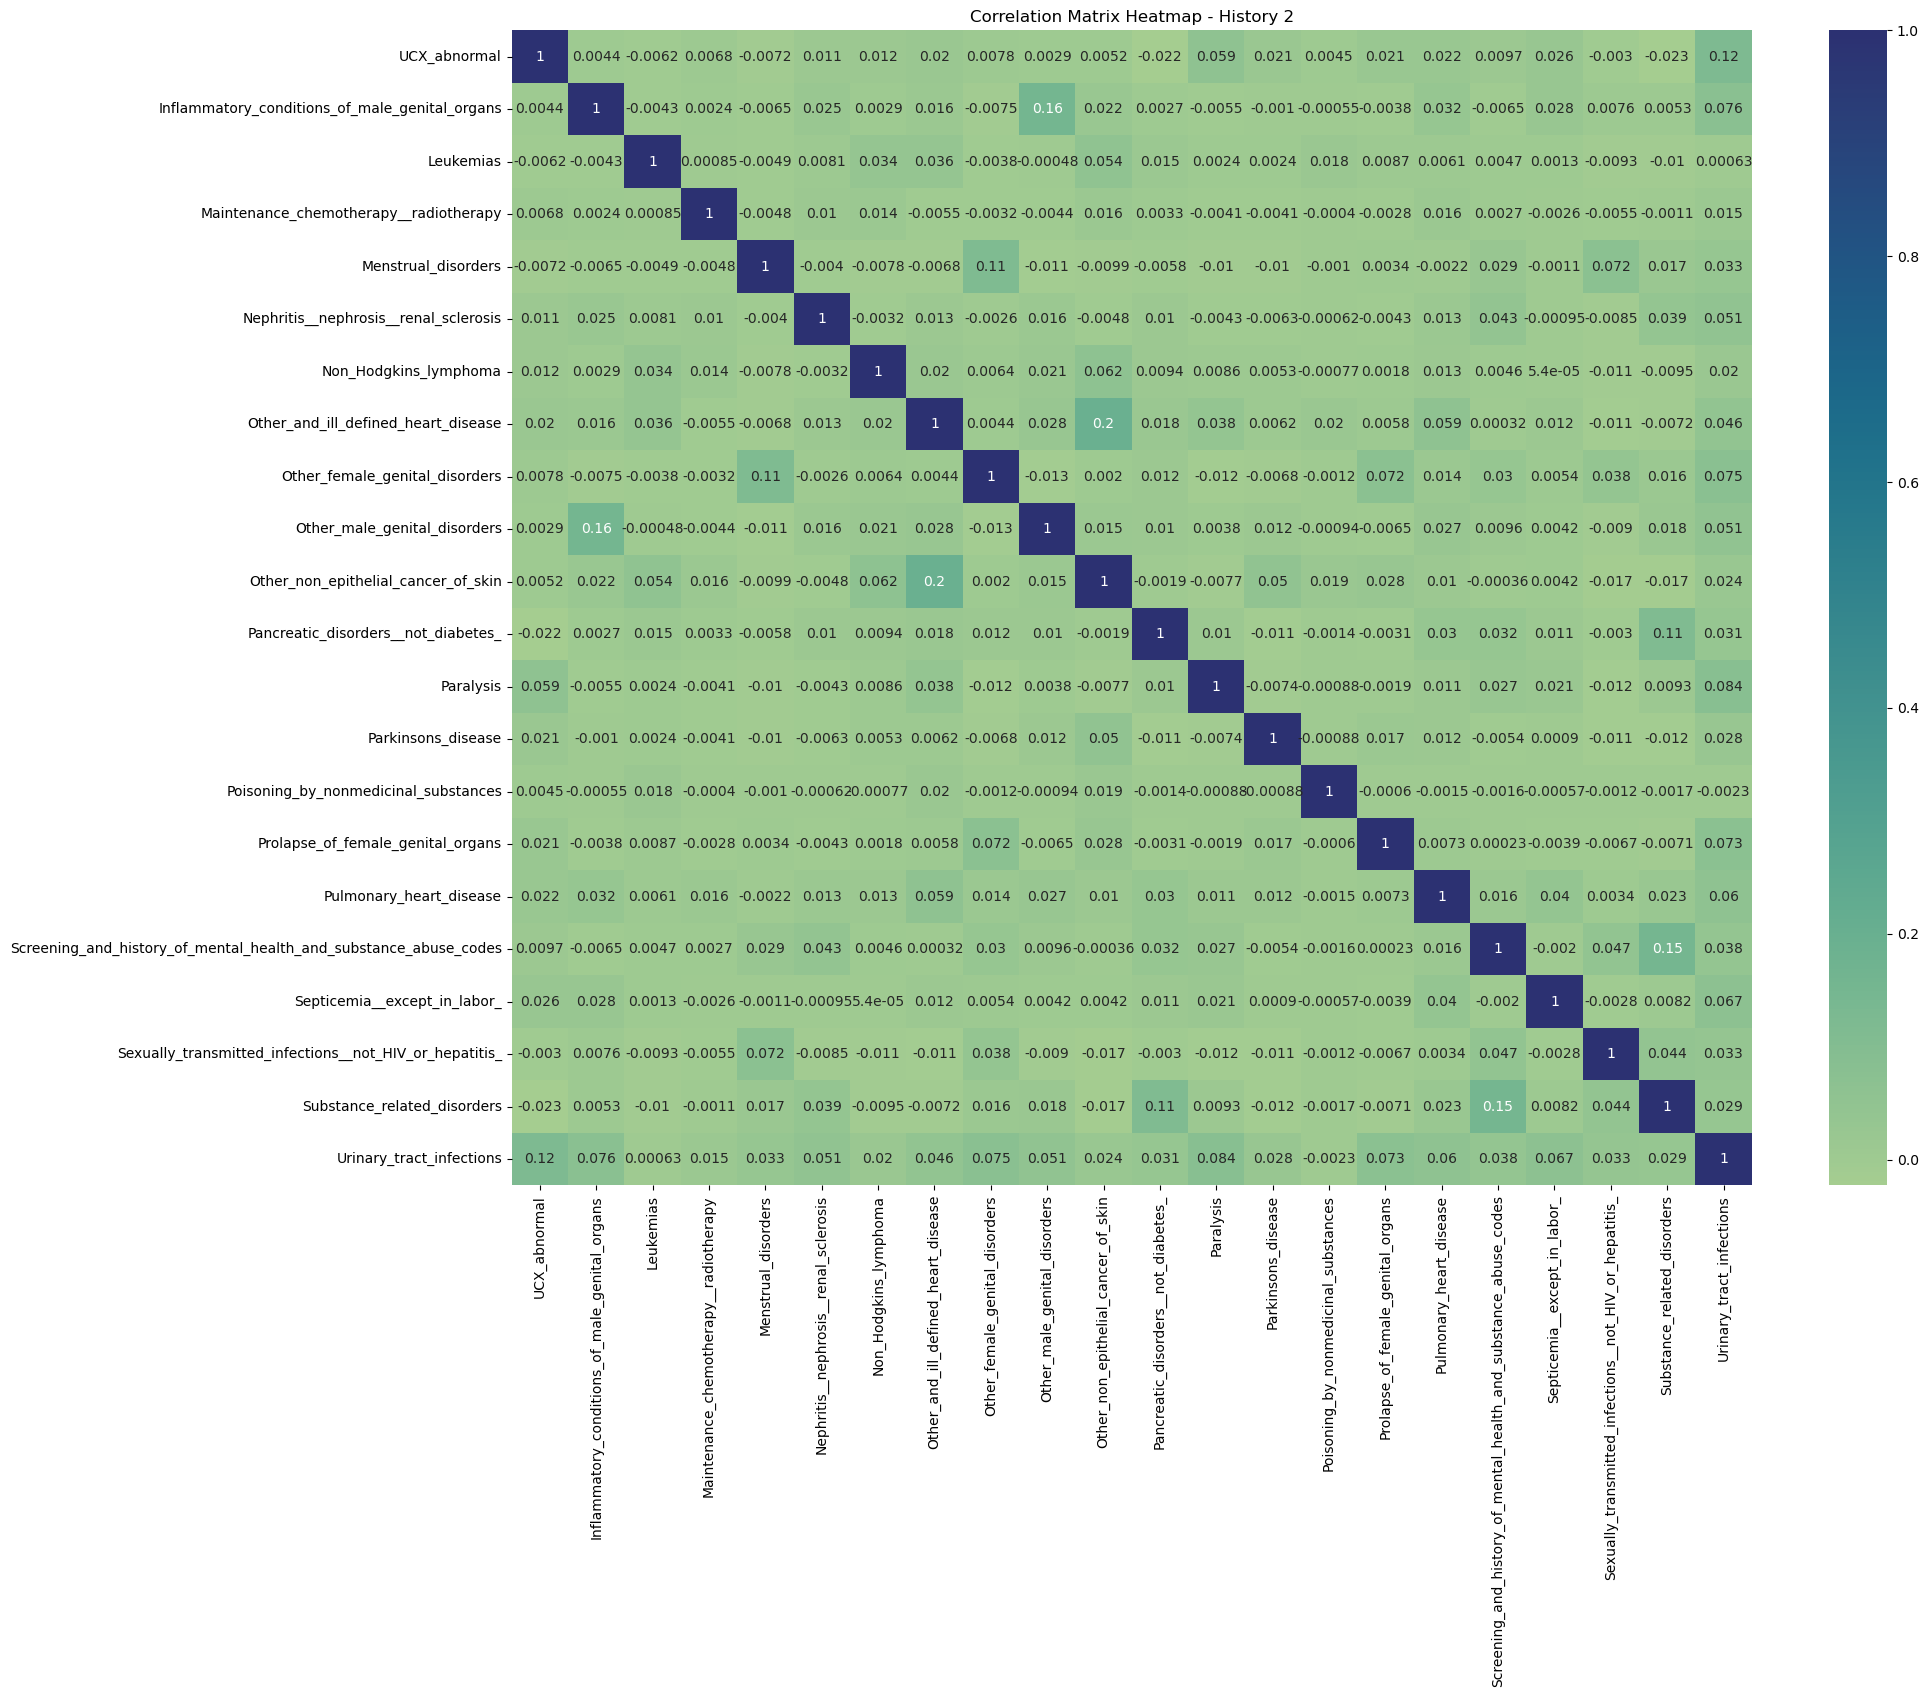

In [38]:
# physical findings
correlation_matrix_his_2 = df_corr[['UCX_abnormal',
       'Inflammatory_conditions_of_male_genital_organs', 'Leukemias',
       'Maintenance_chemotherapy__radiotherapy', 'Menstrual_disorders',
       'Nephritis__nephrosis__renal_sclerosis', 'Non_Hodgkins_lymphoma',
       'Other_and_ill_defined_heart_disease', 'Other_female_genital_disorders',
       'Other_male_genital_disorders', 'Other_non_epithelial_cancer_of_skin',
       'Pancreatic_disorders__not_diabetes_', 'Paralysis',
       'Parkinsons_disease', 'Poisoning_by_nonmedicinal_substances',
       'Prolapse_of_female_genital_organs', 'Pulmonary_heart_disease',
       'Screening_and_history_of_mental_health_and_substance_abuse_codes',
       'Septicemia__except_in_labor_',
       'Sexually_transmitted_infections__not_HIV_or_hepatitis_',
       'Substance_related_disorders', 'Urinary_tract_infections']].corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix_his_2, annot=True, cmap="crest")

# Step 4: Display the heatmap
plt.title('Correlation Matrix Heatmap - History 2')
plt.show()

### 1. Demographics

In [204]:
demo = ['age','gender','race','ethnicity','lang','maritalStatus','employStatus']
df[demo]

,age,gender,race,ethnicity,lang,maritalStatus,employStatus
0,83,Female,Other,Hispanic or Latino,Non-English,Widowed,Not Employed
1,81,Female,White or Caucasian,Non-Hispanic,English,Married,Retired
2,78,Female,White or Caucasian,Non-Hispanic,English,Married,Retired
3,84,Female,White or Caucasian,Non-Hispanic,English,Married,Retired
4,55,Male,Black or African American,Non-Hispanic,English,Married,Full Time
...,...,...,...,...,...,...,...
80382,53,Female,Other,Hispanic or Latino,English,Divorced,Not Employed
80383,22,Female,Other,Hispanic or Latino,English,Single,Part Time
80384,49,Male,Hispanic/Latino,Hispanic or Latino,English,Divorced,Full Time
80385,72,Female,White or Caucasian,Non-Hispanic,English,Married,Retired


In [311]:
# gender
# (ggplot(df)
#  + aes(x = 'gender')
#  + geom_bar())
# diagnosed as UTI
df[df.UTI_diag == 'Yes'].groupby(by = 'gender').apply(lambda x: x.count()/df[df.UTI_diag == 'Yes'].shape[0]).ID

/var/folders/7k/xyz4vj2s7ys2w9r3j0jkhg0c0000gn/T/ipykernel_63149/1970115849.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


gender
Female          0.722009
Male            0.266282
not_reported    0.011709
Name: ID, dtype: float64

In [317]:
# percentage of true UTI
df[df.UCX_abnormal == 'yes'].groupby(by = 'gender').apply(lambda x: x.count()/df[df.UCX_abnormal == 'yes'].shape[0]).ID

/var/folders/7k/xyz4vj2s7ys2w9r3j0jkhg0c0000gn/T/ipykernel_63149/646098727.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


gender
Female          0.784019
Male            0.205371
not_reported    0.010610
Name: ID, dtype: float64

In [333]:
# false positive
df_1 = df[df.UCX_abnormal == 'no'][df.UTI_diag == 'Yes']
df_1.groupby(by = 'gender').apply(lambda x: x.count()/df_1.shape[0]).ID

/var/folders/7k/xyz4vj2s7ys2w9r3j0jkhg0c0000gn/T/ipykernel_63149/3599753980.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/var/folders/7k/xyz4vj2s7ys2w9r3j0jkhg0c0000gn/T/ipykernel_63149/3599753980.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


gender
Female          0.684101
Male            0.303188
not_reported    0.012711
Name: ID, dtype: float64

In [339]:
# retired female has very high false positive rate
df_1.groupby(by = ['employStatus','gender']).apply(lambda x: x.count()/df_1.shape[0]).ID

/var/folders/7k/xyz4vj2s7ys2w9r3j0jkhg0c0000gn/T/ipykernel_63149/770497160.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


employStatus             gender      
Disabled                 Female          0.054907
                         Male            0.038133
Full Time                Female          0.127422
                         Male            0.053761
Not Employed             Female          0.186914
                         Male            0.051677
On Active Military Duty  Female          0.000208
Part Time                Female          0.055428
                         Male            0.009585
Retired                  Female          0.216712
                         Male            0.133465
Self Employed            Female          0.014899
                         Male            0.013024
Student - Full Time      Female          0.024588
                         Male            0.002813
Student - Part Time      Female          0.001459
                         Male            0.000417
Unknown                  Female          0.001563
                         Male            0.000313
not_reported

### 2. symptons

In [345]:
# see antibiotics are prescibed to different symptons - student
re = df[df['employStatus'] == 'Retired']
anti_compl = re.pivot_table(values = 'ID', 
                index = ['chief_complaint'],
                columns = 'abxUTI',
                aggfunc = lambda x: x.count())
anti_compl['Total'] =  anti_compl['yes'] + anti_compl['no']
anti_compl['ratio'] = round(anti_compl['yes']/(anti_compl['yes'] + anti_compl['no']),3)
anti_compl.sort_values(by = 'ratio', ascending = False)

abxUTI,no,yes,Total,ratio
chief_complaint,,,,
URINARY TRACT INFECTION,51,405,456,0.888
FEVER-9 WEEKS TO 74 YEARS,65,464,529,0.877
FEVER,82,515,597,0.863
DYSURIA,44,181,225,0.804
FEMALE GU PROBLEM,77,272,349,0.779
HEMATURIA,137,467,604,0.773
SHORTNESS OF BREATH,271,871,1142,0.763
MALE GU PROBLEM,188,547,735,0.744
VAGINAL BLEEDING,9,23,32,0.719


In [269]:
stu = df[df['employStatus'] == 'Student - Full Time']
anti_compl = stu.pivot_table(values = 'ID', 
                index = 'chief_complaint',
                columns = 'UTI_diag',
                aggfunc = lambda x: x.count())
anti_compl['Total'] =  anti_compl['Yes'] + anti_compl['No']
anti_compl['ratio'] = round(anti_compl['Yes']/(anti_compl['Yes'] + anti_compl['No']),3)
anti_compl.sort_values(by = 'ratio', ascending = False)
# urinary tract infection

UTI_diag,No,Yes,Total,ratio
chief_complaint,,,,
URINARY TRACT INFECTION,27.0,50.0,77.0,0.649
DYSURIA,17.0,24.0,41.0,0.585
FEMALE GU PROBLEM,48.0,36.0,84.0,0.429
FEVER,16.0,10.0,26.0,0.385
BACK PAIN,29.0,13.0,42.0,0.310
HEMATURIA,19.0,7.0,26.0,0.269
FLANK PAIN,128.0,42.0,170.0,0.247
MALE GU PROBLEM,30.0,9.0,39.0,0.231
other,302.0,73.0,375.0,0.195


In [ ]:
# see antibiotics are prescibed to different symptons
abn = df[df['employStatus'] == 'Student - Full Time']
anti_compl = abn.pivot_table(values = 'ID', 
                index = 'chief_complaint',
                columns = 'abxUTI',
                aggfunc = lambda x: x.count())
anti_compl['Total'] =  anti_compl['yes'] + anti_compl['no']
anti_compl['ratio'] = round(anti_compl['yes']/(anti_compl['yes'] + anti_compl['no']),3)
anti_compl.sort_values(by = 'ratio', ascending = False)

### 3. Dipstick Test results

In [ ]:
# bacteria
(ggplot(df,aes(x='ua_bacteria', 
                fill = 'UCX_abnormal'))
 + geom_bar(position="dodge2"))

In [ ]:
# bacteria
(ggplot(df,aes(x='ua_bili', 
                fill = 'UCX_abnormal'))
 + geom_bar(position="dodge2"))

In [ ]:
# bacteria
(ggplot(df,aes(x='ua_blood', 
                fill = 'UCX_abnormal'))
 + geom_bar(position="dodge2"))

In [ ]:
# bacteria
(ggplot(df,aes(x='ua_clarity', 
                fill = 'UCX_abnormal'))
 + geom_bar(position="dodge2"))

In [ ]:
# bacteria
(ggplot(df,aes(x='ua_color', 
                fill = 'UCX_abnormal'))
 + geom_bar(position="dodge2"))

# .. statistical analysis

In [ ]:
# categorical data
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['gender'], df['UCX_abnormal'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

In [ ]:
# continuous data
from scipy.stats import ttest_ind

group_neg = df[df['UCX_abnormal'] =='no']['age']
group_pos = df[df['UCX_abnormal'] == 'yes']['age']

t_stat, p_value = ttest_ind(group_neg, group_pos)